In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fortune-500-companies/Fortune 500 Companies.csv


In [2]:
import pandas as pd

# Path to the CSV file
csv_file_path = os.path.join('/kaggle/input/fortune-500-companies/Fortune 500 Companies.csv')

# Loading the data into a DataFrame
df = pd.read_csv(csv_file_path)

# Displaying the first few rows of the DataFrame
df.head()


,name,rank,year,industry,sector,headquarters_state,headquarters_city,market_value_mil,revenue_mil,profit_mil,asset_mil,employees,founder_is_ceo,female_ceo,newcomer_to_fortune_500,global_500
0,General Motors Corporation,1,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,168828.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ford Motor Company,2,1996,Motor Vehicles & Parts,NaN,MI,NaN,NaN,137137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Exxon Corporation,3,1996,Petroleum Refining,NaN,TX,NaN,NaN,110009.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Wal-Mart Stores, Inc.",4,1996,General Merchandisers,NaN,AR,NaN,NaN,93627.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT&T Corp.,5,1996,Telecommunications,NaN,NY,NaN,NaN,79609.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Checking the proportion of missing values in each column
df.isnull().mean()


name                       0.000000
rank                       0.000000
year                       0.000000
industry                   0.000000
sector                     0.677188
headquarters_state         0.000000
headquarters_city          0.462339
market_value_mil           0.628049
revenue_mil                0.000000
profit_mil                 0.605667
asset_mil                  0.605452
employees                  0.677188
founder_is_ceo             0.677188
female_ceo                 0.677188
newcomer_to_fortune_500    0.677188
global_500                 0.713056
dtype: float64

In [4]:
# Dropping columns with a high proportion of missing values
df_clean = df.drop(columns=['sector', 'market_value_mil', 'profit_mil', 'asset_mil', 'employees', 
                            'founder_is_ceo', 'female_ceo', 'newcomer_to_fortune_500', 'global_500'])

# Dropping rows with missing values in the 'headquarters_city' column
df_clean = df_clean.dropna(subset=['headquarters_city'])

# Displaying the first few rows of the cleaned DataFrame
df_clean.head()


,name,rank,year,industry,headquarters_state,headquarters_city,revenue_mil
5445,"Wal-Mart Stores, Inc.",1,2007,General Merchandisers,AR,Bentonville,351139.0
5446,Exxon Mobil Corporation,2,2007,Petroleum Refining,TX,Irving,347254.0
5447,General Motors Corporation,3,2007,Motor Vehicles & Parts,MI,Detroit,207349.0
5448,Chevron Corporation,4,2007,Petroleum Refining,CA,San Ramon,200567.0
5449,ConocoPhillips,5,2007,Petroleum Refining,TX,Houston,172451.0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set up the directory for saving the visualizations
vis_dir = "/mnt/data/Fortune_500_Visualizations"
os.makedirs(vis_dir, exist_ok=True)

# Set the style of the plots
sns.set_style("whitegrid")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


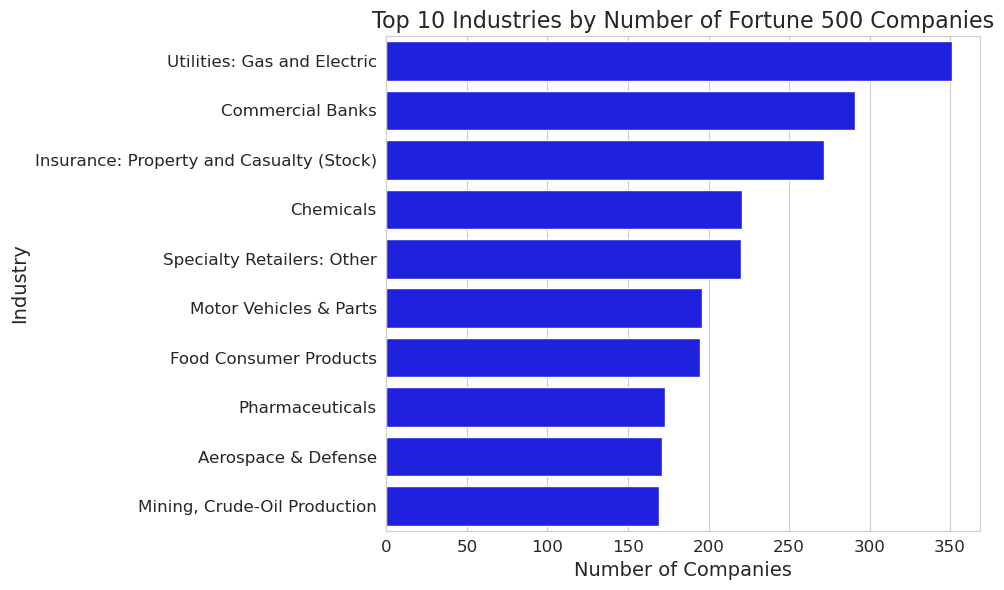

In [6]:
# 1. The distribution of companies by industry
industry_counts = df_clean['industry'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=industry_counts.index, x=industry_counts.values, color='b')
plt.title('Top 10 Industries by Number of Fortune 500 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'industry_distribution.png'), dpi=300)

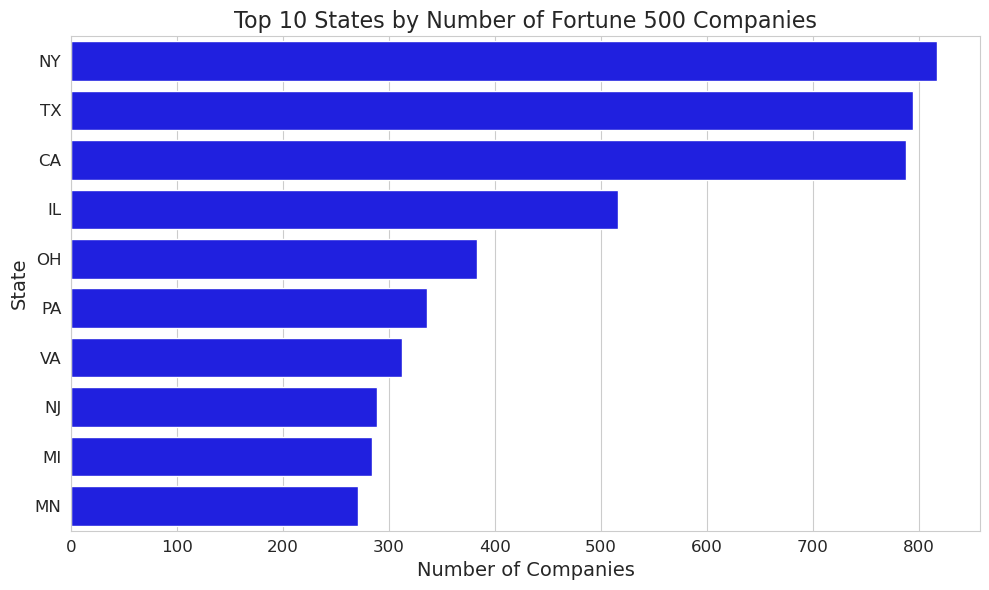

In [7]:
# 2. The distribution of companies by state
state_counts = df_clean['headquarters_state'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=state_counts.index, x=state_counts.values, color='b')
plt.title('Top 10 States by Number of Fortune 500 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'state_distribution.png'), dpi=300)

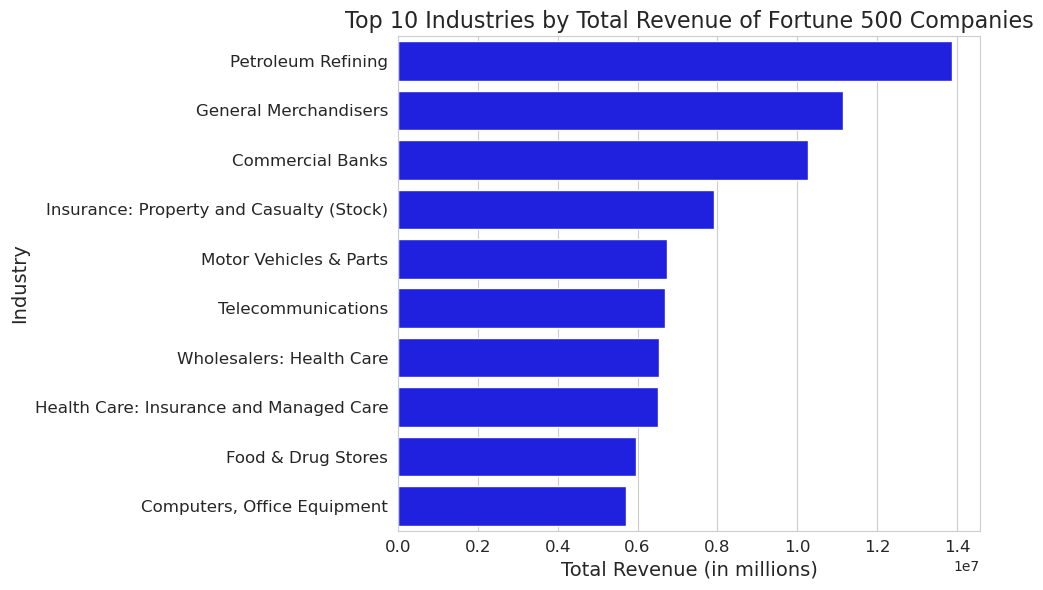

In [8]:
# 3. The distribution of revenue by industry
industry_revenue = df_clean.groupby('industry')['revenue_mil'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=industry_revenue.index, x=industry_revenue.values, color='b')
plt.title('Top 10 Industries by Total Revenue of Fortune 500 Companies', fontsize=16)
plt.xlabel('Total Revenue (in millions)', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'industry_revenue_distribution.png'), dpi=300)

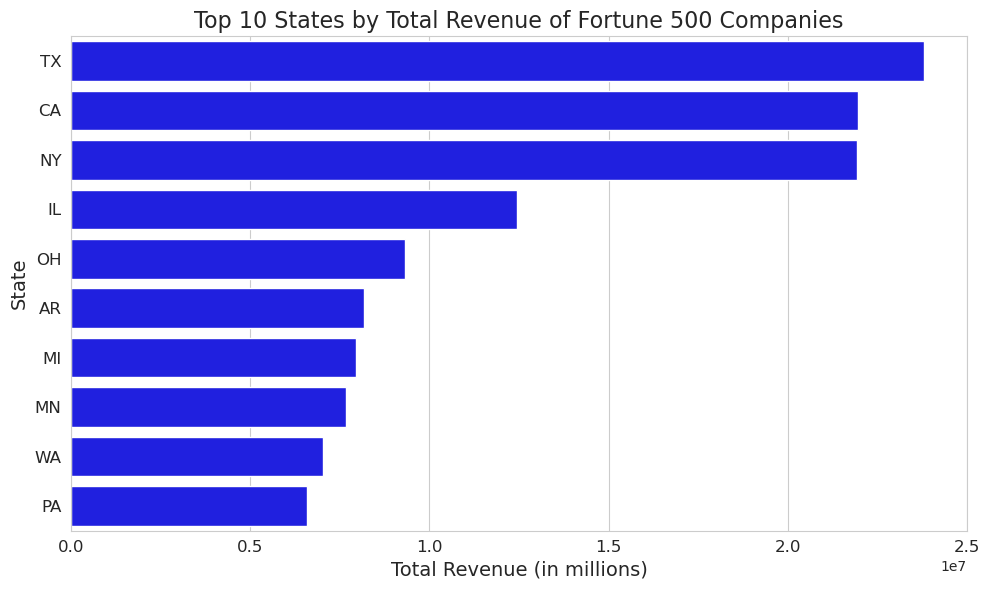

In [9]:
# 4. The distribution of revenue by state
state_revenue = df_clean.groupby('headquarters_state')['revenue_mil'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=state_revenue.index, x=state_revenue.values, color='b')
plt.title('Top 10 States by Total Revenue of Fortune 500 Companies', fontsize=16)
plt.xlabel('Total Revenue (in millions)', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'state_revenue_distribution.png'), dpi=300)

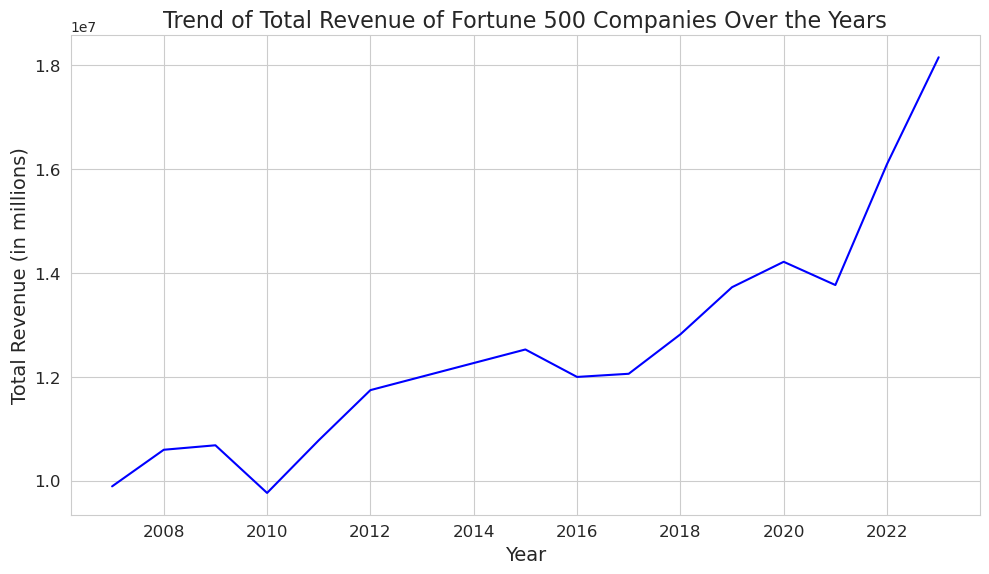

In [10]:
# 5. The trend of the total revenue of the Fortune 500 companies over the years
yearly_total_revenue = df_clean.groupby('year')['revenue_mil'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_total_revenue.index, y=yearly_total_revenue.values, color='b')
plt.title('Trend of Total Revenue of Fortune 500 Companies Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Revenue (in millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'total_revenue_trend.png'), dpi=300)


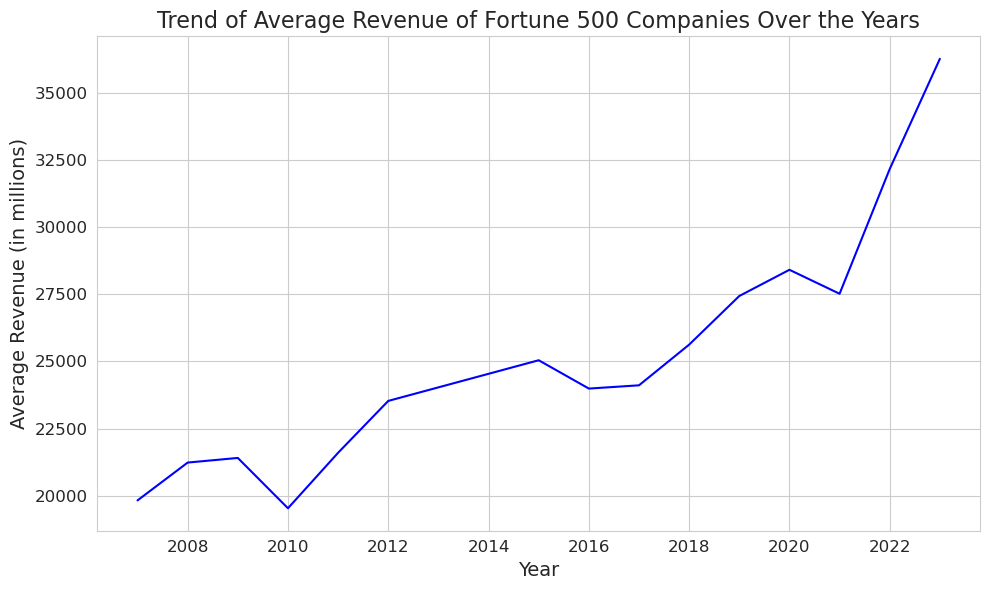

In [11]:
# 6. The trend of the average revenue of the Fortune 500 companies over the years
yearly_avg_revenue = df_clean.groupby('year')['revenue_mil'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_avg_revenue.index, y=yearly_avg_revenue.values, color='b')
plt.title('Trend of Average Revenue of Fortune 500 Companies Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Revenue (in millions)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'average_revenue_trend.png'), dpi=300)


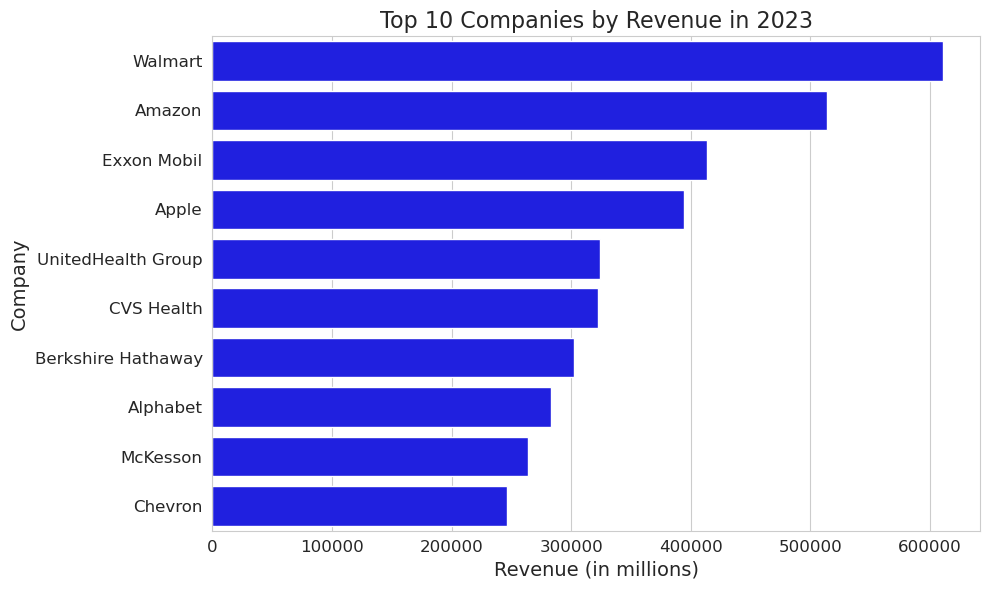

In [12]:
# 7. The top 10 companies by revenue for the latest year in the dataset
latest_year = df_clean['year'].max()
top_companies = df_clean[df_clean['year'] == latest_year].nlargest(10, 'revenue_mil')
plt.figure(figsize=(10, 6))
sns.barplot(y=top_companies['name'], x=top_companies['revenue_mil'], color='b')
plt.title(f'Top 10 Companies by Revenue in {latest_year}', fontsize=16)
plt.xlabel('Revenue (in millions)', fontsize=14)
plt.ylabel('Company', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'top_companies.png'), dpi=300)

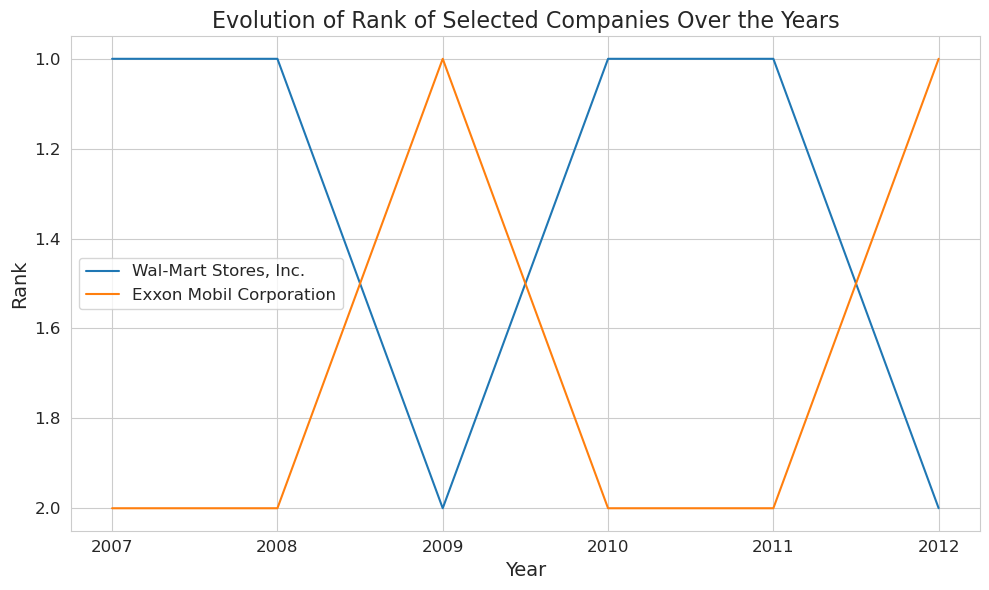

In [13]:
# 8. The evolution of the rank of a few selected companies over the years
selected_companies = ['Wal-Mart Stores, Inc.', 'Exxon Mobil Corporation', 'Apple Inc.']
company_rank_evolution = df_clean[df_clean['name'].isin(selected_companies)]
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='rank', hue='name', data=company_rank_evolution)
plt.title('Evolution of Rank of Selected Companies Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Rank', fontsize=14)
plt.gca().invert_yaxis()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'rank_evolution.png'), dpi=300)

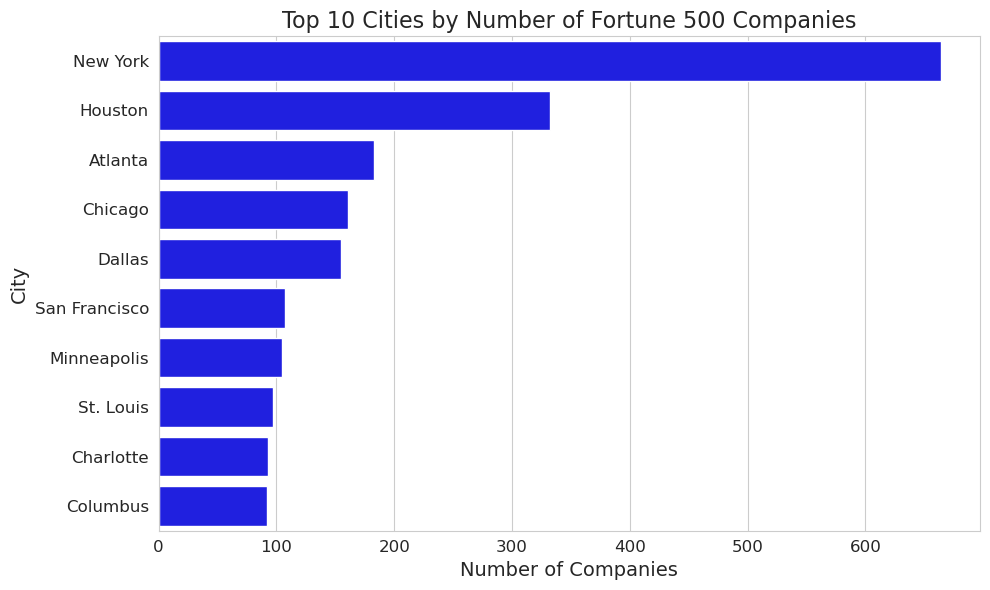

In [14]:
# 9. The top 10 cities by the number of Fortune 500 companies
city_counts = df_clean['headquarters_city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=city_counts.index, x=city_counts.values, color='b')
plt.title('Top 10 Cities by Number of Fortune 500 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'city_distribution.png'), dpi=300)

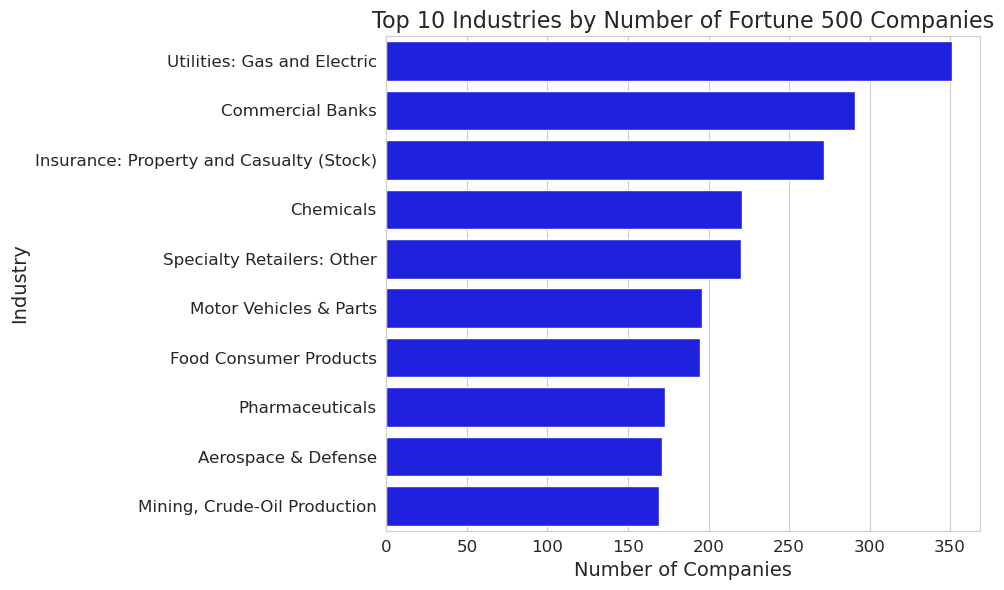

In [15]:
# 10. The top 10 industries by the number of Fortune 500 companies
industry_counts = df_clean['industry'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=industry_counts.index, x=industry_counts.values, color='b')
plt.title('Top 10 Industries by Number of Fortune 500 Companies', fontsize=16)
plt.xlabel('Number of Companies', fontsize=14)
plt.ylabel('Industry', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, 'industry_distribution_2.png'), dpi=300)
